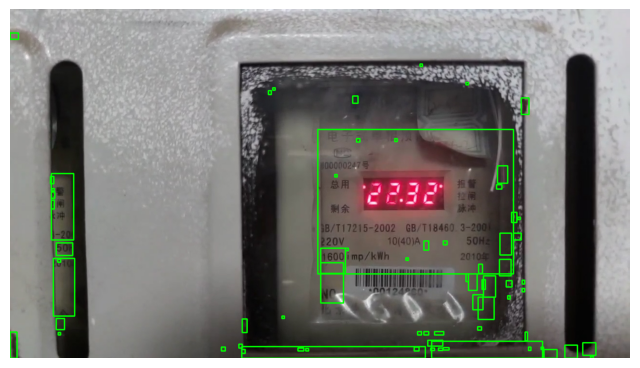

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import random

# 读取图像

random.seed()
imgPath = "./jpgs/" + str (random.randint (1000, 1317)) + ".jpg"
img = cv2.imread(imgPath)

# 转换到HSV色彩空间
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 定义低值和高值,提取红色
lower = np.array([0, 50, 50]) 
upper = np.array([255, 255, 255])
mask = cv2.inRange(hsv, lower, upper)

# 应用模糊去噪声
mask = cv2.GaussianBlur(mask, (5,5), 0)

# 寻找轮廓
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 遍历所有轮廓
for cnt in contours:
    # 获取矩形包围框
    x,y,w,h = cv2.boundingRect(cnt)
    
    # 绘制矩形
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

# 显示带有矩形的原始图像    
showImg = cv2.cvtColor (img, cv2.COLOR_BGR2RGB) 
plt.figure (figsize = (8, 6))
plt.imshow (showImg)
plt.axis ("off")
plt.show ()